In [2]:
import requests
import datetime
import pandas as pd

from joblib import load, dump
from tqdm import tqdm

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [6]:
df_jun = pd.read_parquet("taxi_0624.parquet")
df_jul = pd.read_parquet("taxi_0724.parquet")

In [7]:
df_jun.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')

In [17]:
df_jun["duration_min"] = ((df_jun.tpep_dropoff_datetime - df_jun.tpep_pickup_datetime).dt.total_seconds() / 60).round(2)

In [19]:
df_jun = df_jun[(df_jun["duration_min"].ge(0)) & (df_jun["duration_min"].le(60))]

In [21]:
df_jun = df_jun[(df_jun["passenger_count"].ge(0)) & (df_jun["passenger_count"].le(8))]

<Axes: >

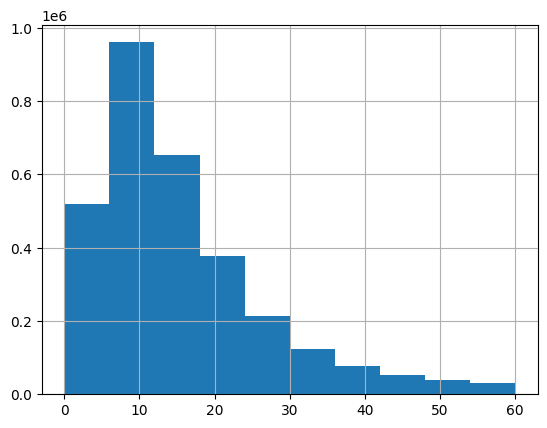

In [23]:
df_jun.duration_min.hist()

In [24]:
from sklearn.model_selection import train_test_split

In [26]:
target = "duration_min"
num_features = ["passenger_count", "trip_distance", "fare_amount", "total_amount"]
cat_features = ["PULocationID", "DOLocationID"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_jun, test_size=0.3)

In [27]:
model = LinearRegression()

In [ ]:
model.fit()